In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Data=pd.read_csv("advertising.csv")

In [5]:
Data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [6]:
Data.shape

(200, 4)

In [7]:
Data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
Data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
Data.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

/tmp/ipykernel_2504972/1412330660.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data.Sales)


<AxesSubplot: xlabel='Sales', ylabel='Density'>

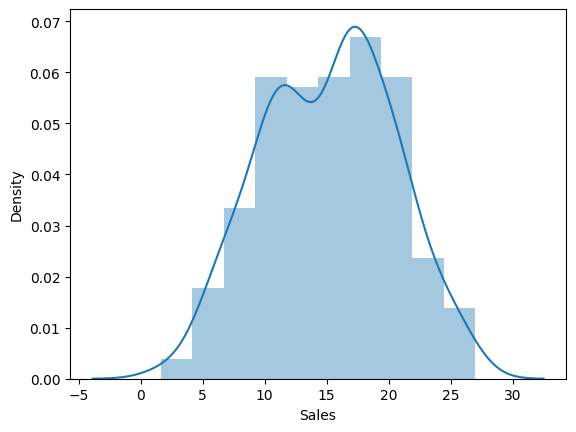

In [10]:
sns.distplot(Data.Sales) 

/tmp/ipykernel_2504972/394435878.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data.Newspaper)


<AxesSubplot: xlabel='Newspaper', ylabel='Density'>

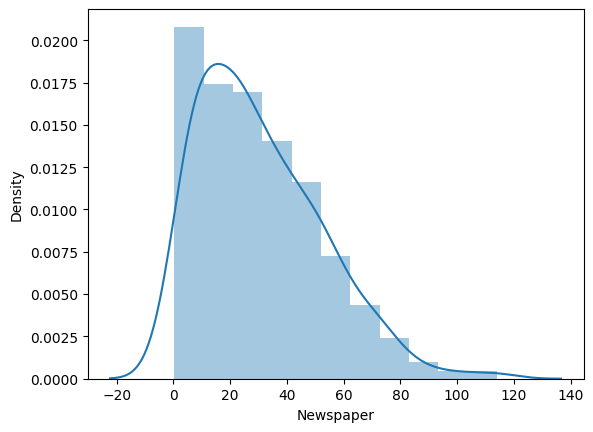

In [11]:
sns.distplot(Data.Newspaper)

/tmp/ipykernel_2504972/4250872160.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data.TV)


<AxesSubplot: xlabel='TV', ylabel='Density'>

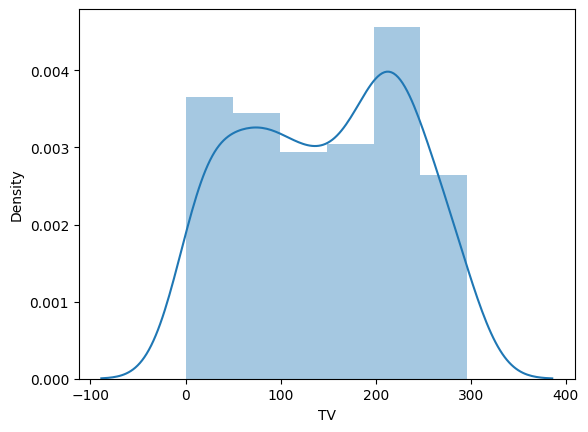

In [12]:
sns.distplot(Data.TV)

/tmp/ipykernel_2504972/4008822381.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data.Radio)


<AxesSubplot: xlabel='Radio', ylabel='Density'>

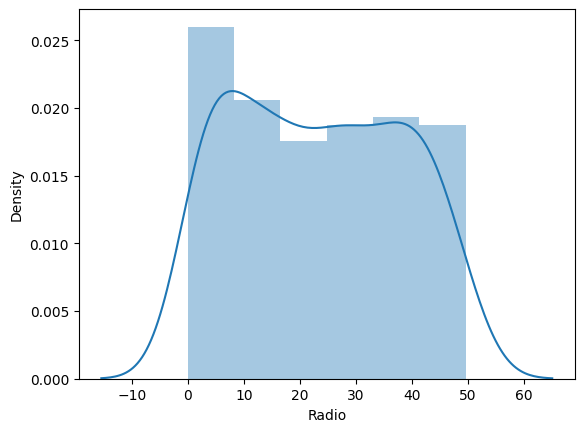

In [13]:
sns.distplot(Data.Radio)

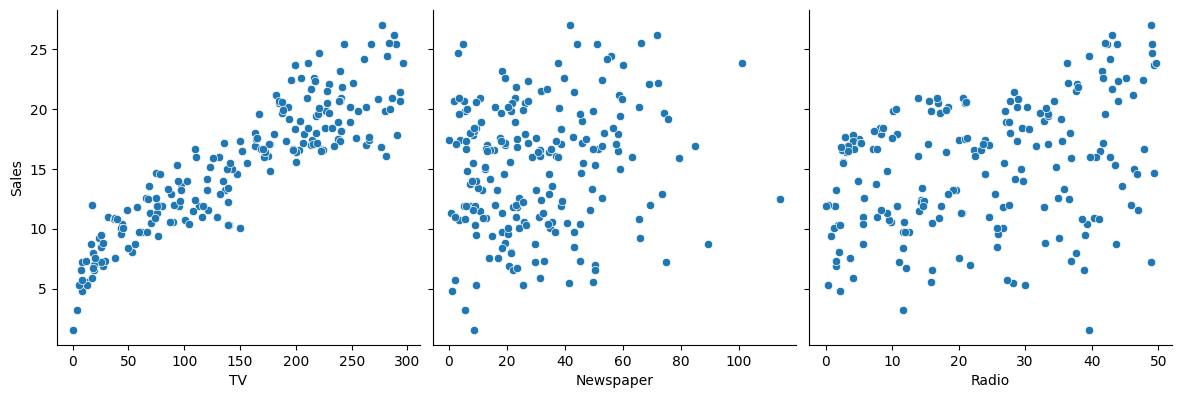

In [14]:
sns.pairplot(Data, x_vars=['TV', 'Newspaper', 'Radio'],y_vars='Sales',height=4,aspect=1, kind='scatter')
plt.show()

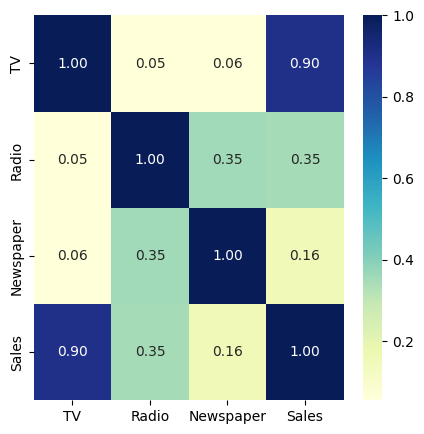

In [15]:
plt.figure(figsize=(5,5))
sns.heatmap(Data.corr(), cmap="YlGnBu",annot=True,fmt='.2f')
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
X = Data[['TV', 'Radio', 'Newspaper']]
Y = Data['Sales']

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
Model = LinearRegression()

In [21]:
Model.fit(X_train, Y_train)

LinearRegression()

In [22]:
X_train.head()

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6


In [23]:
Y_train.head()

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
Name: Sales, dtype: float64

In [25]:
prediction= Model.predict(X_test)

In [26]:
print(Model.coef_)
print(Model.intercept_)

[0.05450927 0.10094536 0.00433665]
4.714126402214129


In [30]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, prediction)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.907756910271091


In [31]:
Model.score(X_test, Y_test)

0.9059011844150826

In [37]:
import pandas as pd
new_data = pd.DataFrame([[100, 25, 10]])
new_sales_prediction = Model.predict(new_data)
print(f"Predicted Sales for New Data: {new_sales_prediction}")


Predicted Sales for New Data: [12.73205401]


/home/jupyter-711122243030/.local/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
